In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt 
from scipy.fftpack import fft,ifft
from scipy.signal.windows import hamming
import sounddevice as sd
import soundfile as sf
import librosa

In [2]:
# A function to plot signal
def plot_signal(s, i, time_axis, hop_size):
    plt.figure()
    plt.plot(time_axis[i*hop_size:(i*hop_size+win_size)],s)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    
# A function to plot spectrogram   
def plot_spectrogram(spectrogram):
    plt.imshow(spectrogram)
    plt.show()

### 1.  Implement a function to compute power spectrogram. (1 point)

In [67]:
# Read audio
audio1, fs1 = sf.read("audio1.wav")

def compute_power_spectrogram(audio1, fs1, dt, hop_percent=0.5):
    # Set parameters
    time_axis = np.arange(0.0,len(audio1)/fs1, 1.0/fs1)
    win_size = int(dt*fs1) # number of signal points per 100ms
    window = hamming(win_size)
    hop_size = int(win_size * hop_percent) # b) Add overlap between consecutive signal frames.
    # plot_signal(audio1, 0, time_axis, hop_size)
    nfft = win_size
    nframes = len(audio1) // (win_size // 2) - 1
    power_spectrogram = np.zeros((win_size, nframes))

    # Loop through the frames
    for i in np.arange(0, nframes):
        # Select audio frame
        segment=audio1[i*hop_size:i*hop_size+win_size]
        # a) Multiply each signal frame with a windowing function.
        segment_wind = segment * window

        # DFT spectrum
        audio_fft = fft(segment, nfft)
        audio_fft_wind = fft(segment_wind, nfft)
        # Select a frame and plot the spectrum with and without windowing.
        spectrum = np.abs(audio_fft)
        spectrum_wind = np.abs(audio_fft_wind)

        if (i == nframes//2):
            fig, ax = plt.subplots()
            ax.plot(spectrum[:win_size//2]/win_size, alpha=0.5)
            ax.plot(spectrum_wind[:win_size//2]/win_size, alpha=0.5)
            ax.legend(["without_window", "with_window"])
            ax.set_xlabel("frequency (Hz)")
            ax.set_ylabel("magnitude")
            plt.title("spectrum with and without window")
            plt.show()

        # c) Collect the power spectrum into a matrix.
        power_spectrum = np.power(spectrum_wind, 2)
        power_spectrum[power_spectrum==0] = 0.0001 # avoid log10(0)
        power_spectrogram[:,i] = power_spectrum
    return power_spectrogram

#### Plot the matrix (power_spectrogram) as an image.

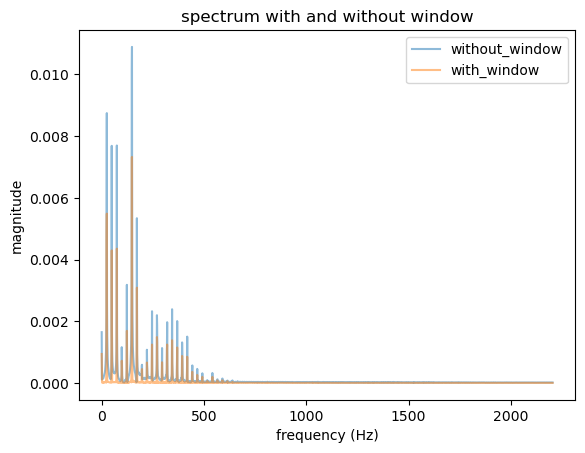

1516.7451022424257


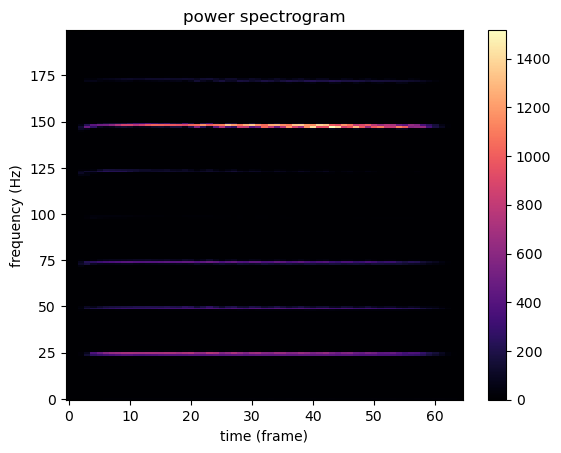

In [68]:
power_spectrogram = compute_power_spectrogram(audio1, fs1, 0.1, 0.5)
print(np.max(power_spectrogram))
plt.imshow(power_spectrogram[:200], cmap = 'magma', interpolation='nearest',  aspect='auto')
plt.xlabel("time (frame)")
plt.ylabel("frequency (Hz)")
plt.title("power spectrogram")
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

#### Plot the logarithm of the matrix.

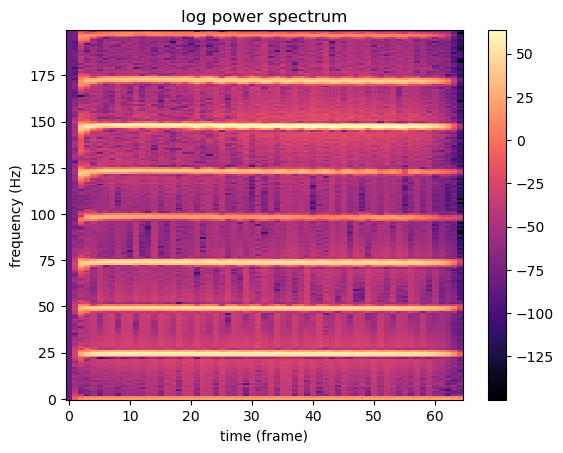

In [69]:
plt.imshow((20*np.log10(power_spectrogram))[:200], cmap = 'magma', interpolation='nearest',  aspect='auto')
plt.colorbar()
plt.xlabel("time (frame)")
plt.ylabel("frequency (Hz)")
plt.title("log power spectrum")
plt.gca().invert_yaxis()
plt.show()

#### What differences do you observe?

- The log function reduce the scale of the power, also reduce the distance between small and large power values.
- Helps increasing the visibility of the power spectrogram.

### 2.  Analyse the effect of window size on the spectrum. (1 point)

#### a) Calculate spectrogram with librosa and nfft=window size

1517.275789903927


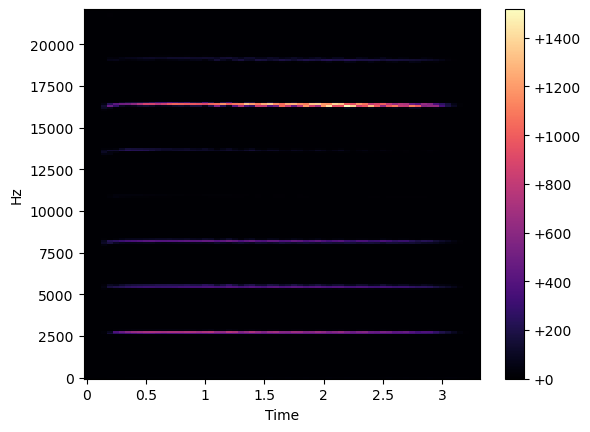

In [70]:
win_size = int(0.1*fs1)
stft_audio = librosa.stft(audio1, n_fft = win_size, win_length = win_size, hop_length = win_size//2, window="hamm")
power_audio = np.power(np.abs(stft_audio),2)
print(np.max(power_audio))
librosa.display.specshow(power_audio[:200], sr = fs1, hop_length = win_size//2, x_axis = "time", y_axis = "linear")
plt.colorbar(format="%+2.f")
plt.show()

#### Are there any differences from your own implementation?

- librosa return a nearly the same power spectrum as the scipy implementation
- librosa specshow doesn't align when slicing the power_audio array

#### b) Apply your implementation with different window sizes (16ms, 32ms, 64ms and 128ms) to different signals (audio1, audio2 and synthetic sinusoids from exercise 1)

#### Note. You can define your implementation from problem 1 as a function and call it for each of the signals.

USING AUDIO =  audio1
Spectrum and Power Spectrum with  0.016 ms time interval


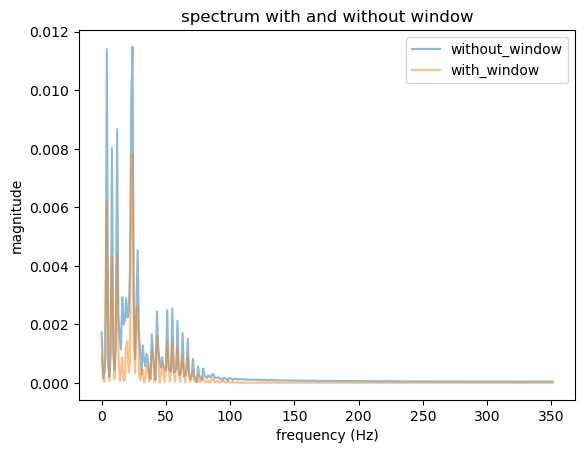

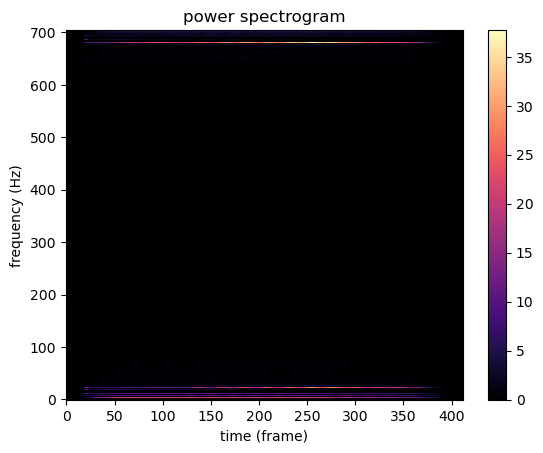

Spectrum and Power Spectrum with  0.032 ms time interval


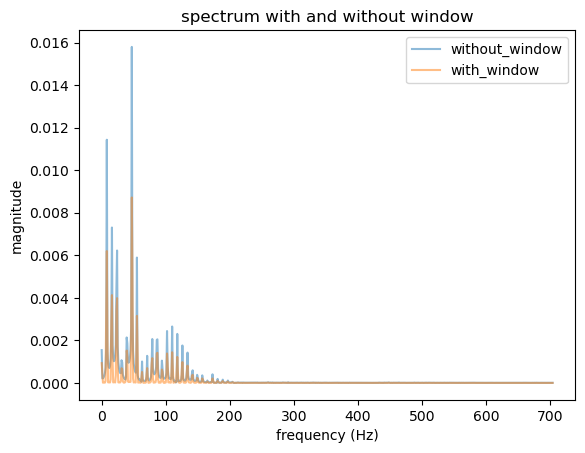

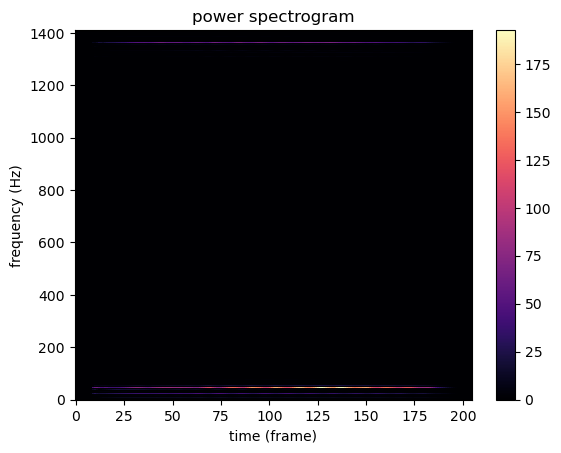

Spectrum and Power Spectrum with  0.064 ms time interval


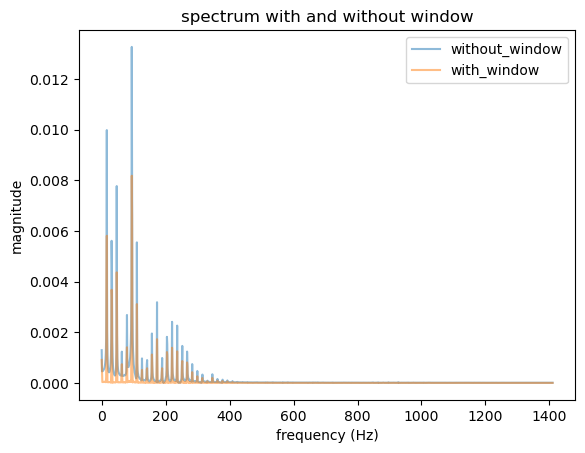

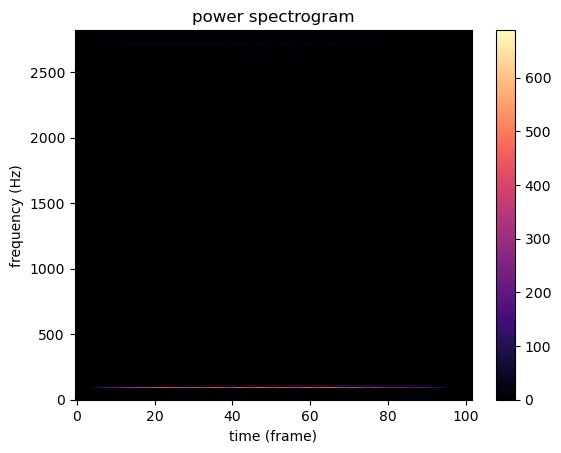

Spectrum and Power Spectrum with  0.128 ms time interval


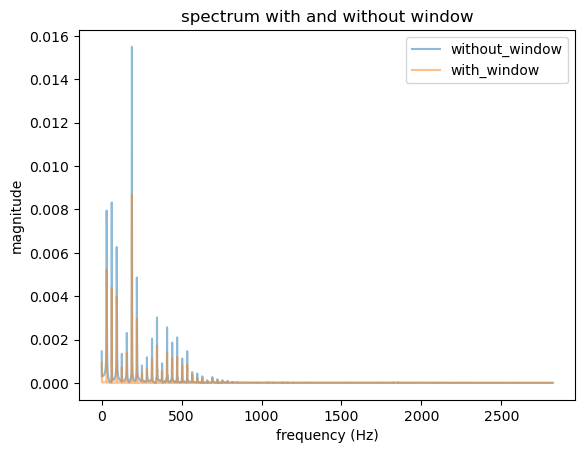

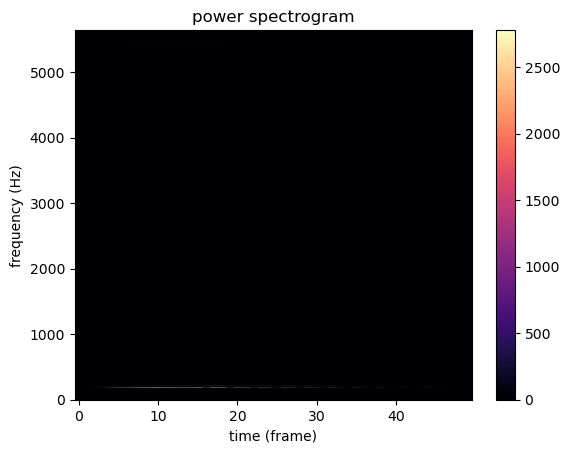

USING AUDIO =  audio2
Spectrum and Power Spectrum with  0.016 ms time interval


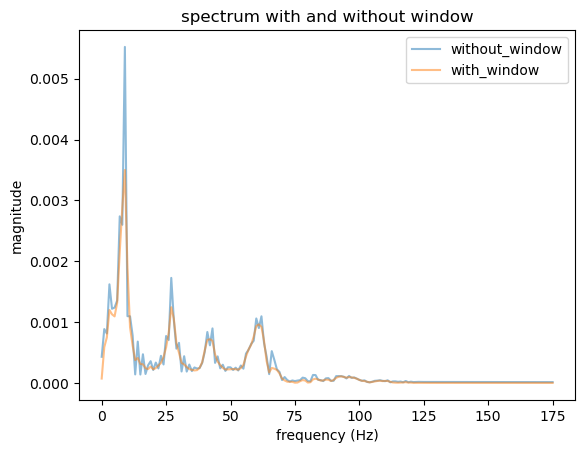

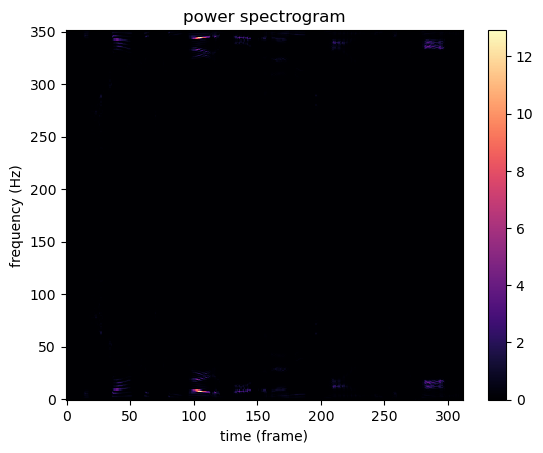

Spectrum and Power Spectrum with  0.032 ms time interval


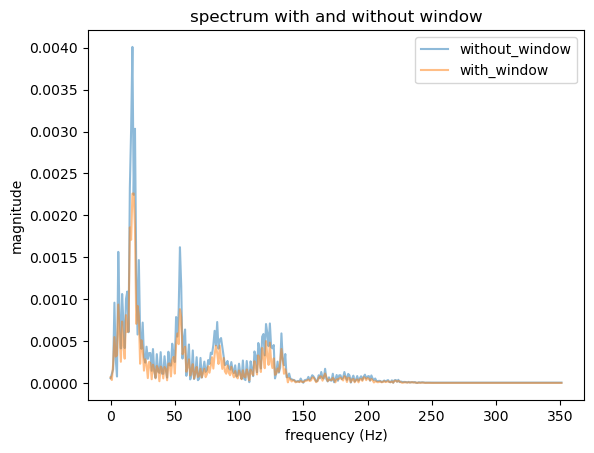

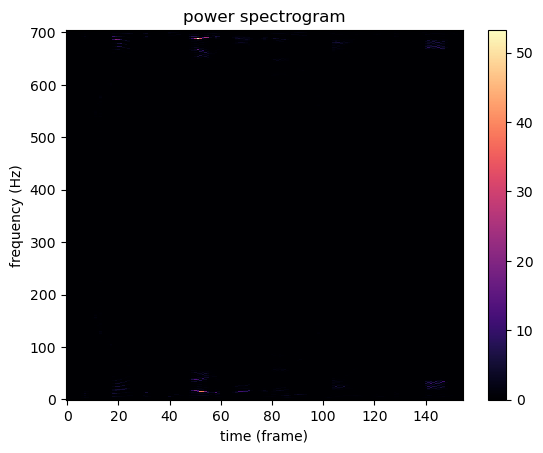

Spectrum and Power Spectrum with  0.064 ms time interval


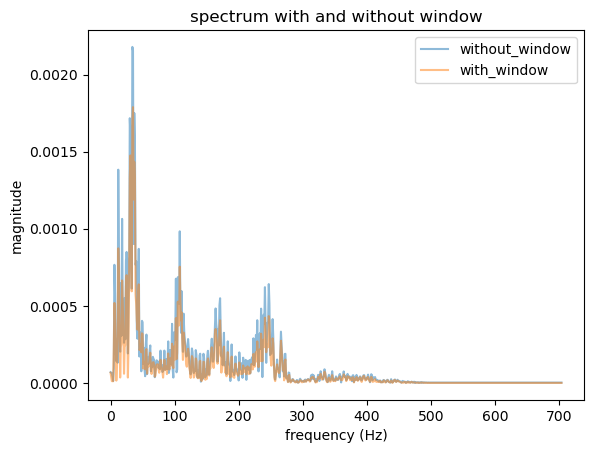

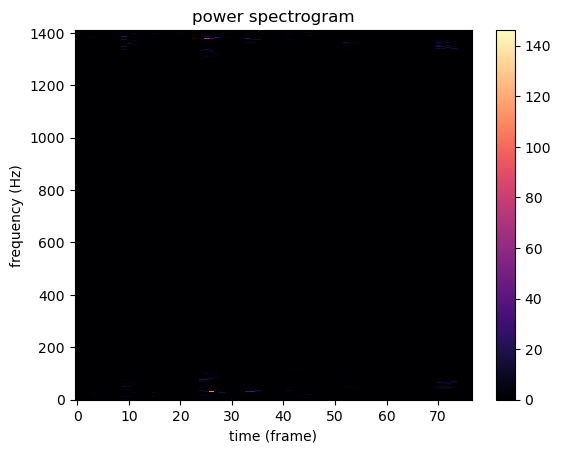

Spectrum and Power Spectrum with  0.128 ms time interval


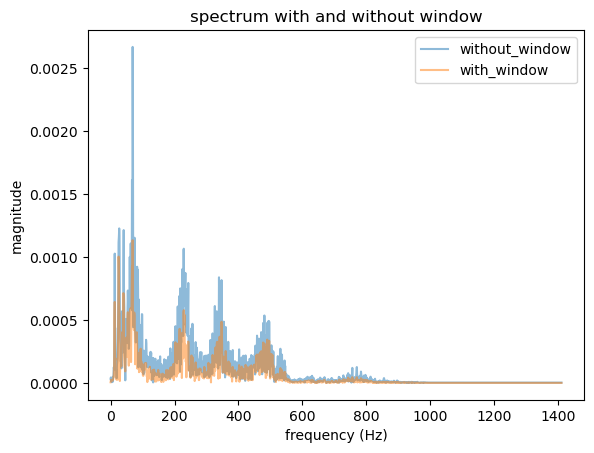

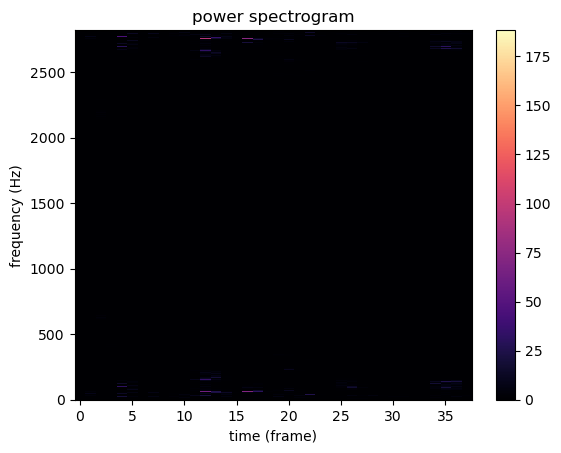

USING AUDIO =  audiox
Spectrum and Power Spectrum with  0.016 ms time interval


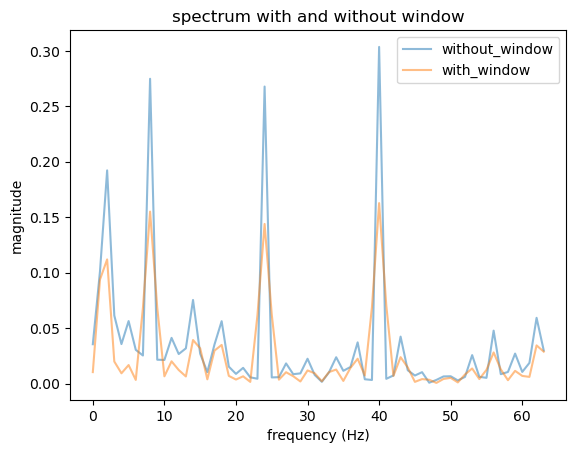

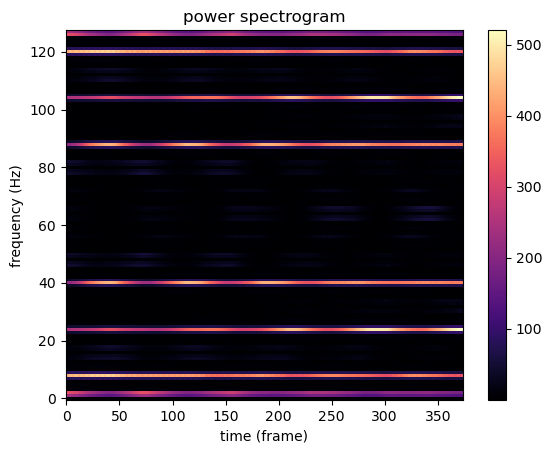

Spectrum and Power Spectrum with  0.032 ms time interval


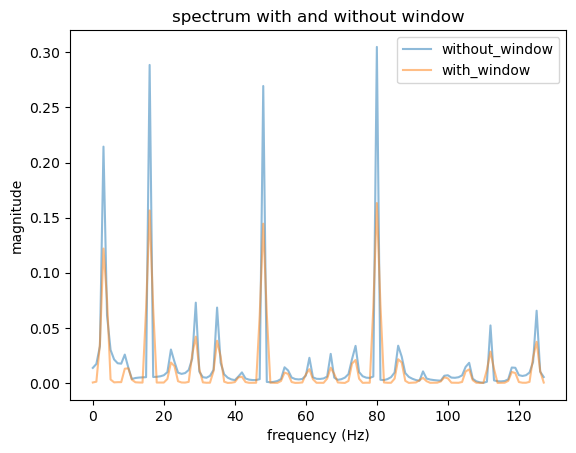

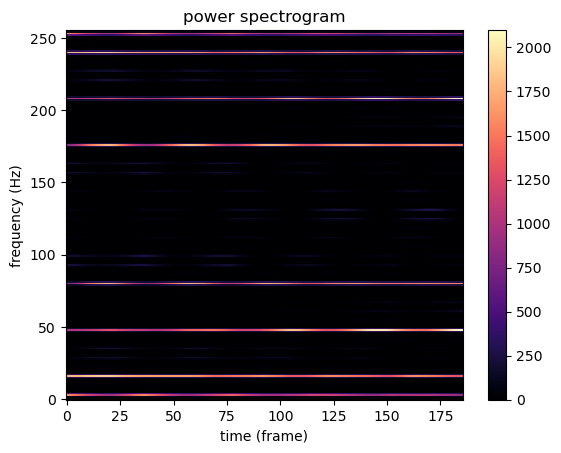

Spectrum and Power Spectrum with  0.064 ms time interval


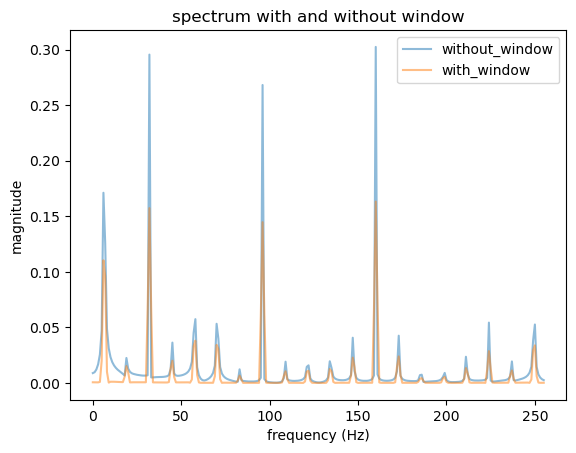

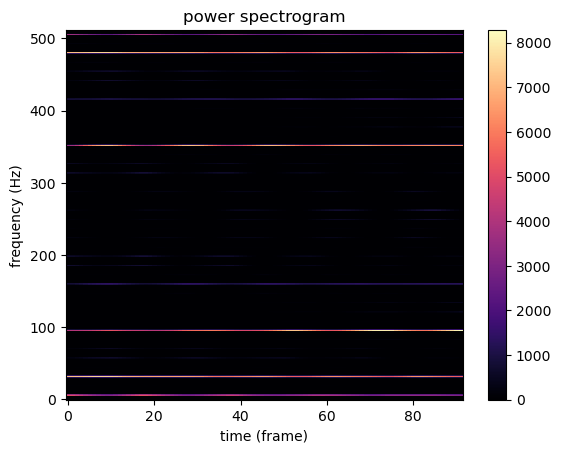

Spectrum and Power Spectrum with  0.128 ms time interval


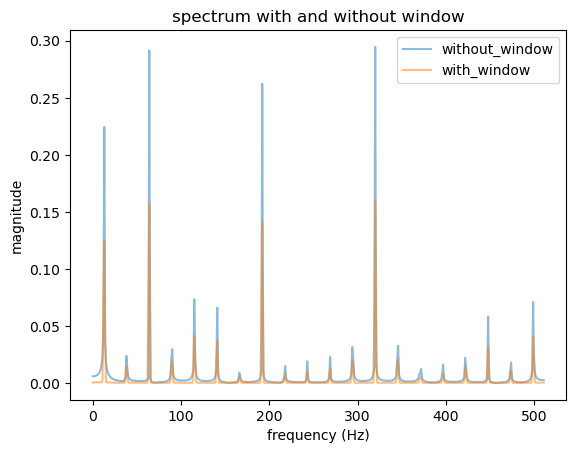

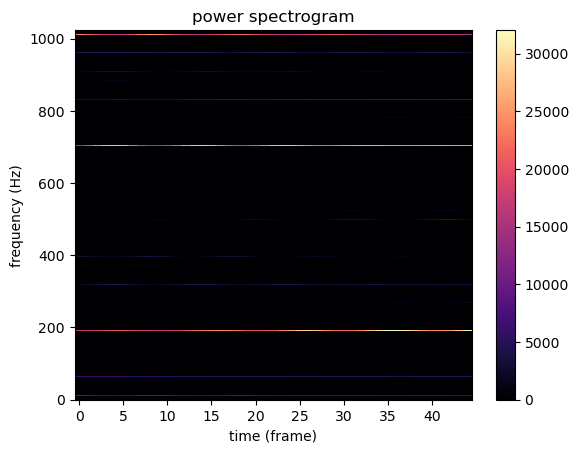

In [71]:
dts = [0.016, 0.032, 0.064, 0.128]
audio1, fs1 = sf.read("audio1.wav")
audio2, fs2 = sf.read("audio2.wav")
audiox, fsx = sf.read("x.wav")
audios = [audio1, audio2, audiox]
fss = [fs1, fs2, fsx]
names = ["audio1", "audio2", "audiox"]

for i in range(len(audios)):
    print("USING AUDIO = ", names[i])
    for dt in dts:
        print("Spectrum and Power Spectrum with ", dt, "ms time interval")
        power_spectrogram = compute_power_spectrogram(audios[i], fss[i], dt, 0.5)
        plt.imshow(power_spectrogram, cmap = 'magma', interpolation='nearest',  aspect='auto')
        plt.xlabel("time (frame)")
        plt.ylabel("frequency (Hz)")
        plt.title("power spectrogram")
        plt.gca().invert_yaxis()
        plt.colorbar()
        plt.show()

#### c) What happens when the window size is increased?

- Increase window size will increase the max level of the power spectrum (see in the power spectrogram)
- Larger window size will also increase the maximum frequecy (see in both in spectrum and power spectrogram)

#### What analysis window lenght is best for each of the signal types?

- audio1 (instrument note): 0.064ms is the best because it emphasizes the note of the instrument and remove others sound
- audio2 (speech): 0.128ms is best because it suppress the high peek so more easy to listen
- audiox (synthesis): 0.016ms shows every frequencies that create that synthesis

### Bonus problem: Implement overlap-add reconstruction